- Library imports

In [21]:
import pandas as pd
import string
import requests
from bs4 import BeautifulSoup
import numpy as np

- Define Functions

In [22]:

filters = ['job_title', 'job_description']
def get_and_clean_data():
    # Load the dataset
    data = pd.read_csv('resource/software_developer_united_states_1971_20191023_1.csv')
    
    # Select the columns from filters
    filtered_data = data[filters]
    
    # Clean all columns from filters
    for column in filters:
        filtered_data[column] = filtered_data[column].fillna('')  # Handle missing values
        # Avoid removing characters like # and + (important for C#, C++)
        filtered_data[column] = filtered_data[column].apply(lambda s: s.translate(str.maketrans('', '', string.punctuation.replace('#', '').replace('+', ''))))
        filtered_data[column] = filtered_data[column].apply(lambda s: s.lower())
        filtered_data[column] = filtered_data[column].apply(lambda s: s.translate(str.maketrans(string.whitespace, ' '*len(string.whitespace), '')))
    
    # Remove duplicates
    filtered_data = filtered_data.drop_duplicates()
    
    return filtered_data

def simple_tokenize(data):
    # Tokenize each column of text
    for column in filters:
        data[column] = data[column].apply(lambda s: [x.strip() for x in s.split()])
    return data


- Read the data

In [23]:
# Read and store the data
data = get_and_clean_data()
# tokenize words into array
data = simple_tokenize(data)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1756\2621423344.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].fillna('')  # Handle missing values
C:\Users\Admin\AppData\Local\Temp\ipykernel_1756\2621423344.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column] = filtered_data[column].apply(lambda s: s.translate(str.maketrans('', '', string.punctuation.replace('#', '').replace('+', ''))))
C:\Users\Admin\AppData\Local\Temp\ipykernel_1756\262

In [24]:
# Print
print(data.head(10).to_markdown())

|    | job_title                                               | job_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

---
**Q1 :** Identify database and programming language proficiencies essential for a junior-level `(2pts, should be achievable by everyone)`

- Firstly, we filter and find only jobs with **junior** title


In [25]:
# Filter data for 'junior' or similar terms
junior_roles = data[data['job_title'].apply(lambda tokens: 'junior' in tokens or 'jr' in tokens)]
print(f'Job counts = {len(junior_roles)}')

Job counts = 513


In [26]:
# Print
print(junior_roles.head(30).to_markdown())

|     | job_title                                                                                                                    | job_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

- Now we can map and count all of the programming languages in job description of our filtered data
    
    We can do that by comparing can count it into counter, saved in dictionary to have multiple data like
    
    ```
    {
        lang1 : 20,
        lang2 : 21
        ...
    }
    ```

    after that, we sort the list and we can get the most frequent one as the most essential one.

In [27]:
# Map languages
program_languages = ['c','c#','c++','java','python','kotlin','swift','rust','ruby','scala','julia','lua']
languages_counter = {}
for pl in program_languages:
    # Count each languages found mentioned in description
    count = junior_roles['job_description'].apply(lambda s: pl in s).sum()
    languages_counter[pl] = count

# Sort ranking
languages_counter = sorted(languages_counter.items(), key=lambda x: x[1], reverse=True)
# Display the ranking
print("For programming Languages: ")
for lang, count in languages_counter:
    print(f' - {lang}: {count}')

# Saving the most esstential language
top_lang = languages_counter[0][0]

For programming Languages: 
 - java: 270
 - c#: 194
 - c++: 129
 - python: 88
 - c: 75
 - ruby: 73
 - swift: 10
 - scala: 5
 - kotlin: 0
 - rust: 0
 - julia: 0
 - lua: 0


In [28]:
# List of database keywords
databases = ['mysql', 'postgresql', 'mssql', 'oracle', 'sqlite', 'mongodb', 'cassandra', 'redis', 'dynamodb', 'firebase', 'neo4j', 'cloudsql', 'aws', 'azure', 'bigquery']
databases_counter = {}
for db in databases:
    count = junior_roles['job_description'].apply(lambda s: db in s).sum()
    databases_counter[db] = count

# Sort ranking
databases_counter = sorted(databases_counter.items(), key=lambda x: x[1], reverse=True)
# Display the ranking
print("For databases: ")
for db, count in databases_counter:
    print(f' - {db}: {count}')

# Saving the most esstential database
top_database = databases_counter[0][0]

For databases: 
 - oracle: 101
 - mysql: 86
 - aws: 34
 - azure: 19
 - mssql: 11
 - postgresql: 10
 - mongodb: 8
 - sqlite: 3
 - cassandra: 3
 - redis: 3
 - dynamodb: 2
 - neo4j: 1
 - firebase: 0
 - cloudsql: 0
 - bigquery: 0


- Now I've selected the most essentials:

        top_lang for programming languages
        top_database for database

`Answer for Q1 is right below here`

In [29]:
print(f'Top language is :> {top_lang}')
print(f'Top database is :> {top_database}')

Top language is :> java
Top database is :> oracle


---
 **Q2 :** For a long-term skill development plan, determine an additional programming language to complement your initial choice for a first job.
<br>`(2 pts – achievable with extra effort)`

Hints:<br> 
    - Analyze effective pairings between your selected language and one another programming language at time.<br>
    - Focus only on senior-level role.<br>

- So in my approach I'll be
    - Filtered and get seniors jobs from data
    - Finding co-occured languages with top language (language that appear with java)
    - Ranks by most frequent co-occured

In [30]:
# Filter data for 'senior' or similar terms
senior_roles = data[data['job_title'].apply(lambda tokens: 'senior' in tokens or 'sr' in tokens)] # I've decided to not include lead devs because it's not focus on programming languages, but rather management skills
print(f'Job counts = {len(senior_roles)}')

Job counts = 1583


In [31]:
# Print
print(senior_roles.head(30).to_markdown())

|     | job_title                                                                                        | job_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [32]:
# Find co-occured with top_lang, start by filtering to get jobs with top language
top_senior_roles = senior_roles[senior_roles['job_description'].apply(lambda tokens: top_lang in tokens)]
print(f'Job counts = {len(top_senior_roles)}, filtered by {top_lang}')

Job counts = 706, filtered by java


In [33]:
# Print check
print(top_senior_roles.head(30).to_markdown())

|     | job_title                                                                  | job_description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [34]:
# List of programming languages to check
program_languages.remove(top_lang)
co_occurrence_counts = {}
for pl in program_languages:
    count = top_senior_roles['job_description'].apply(lambda tokens: pl in tokens).sum()
    co_occurrence_counts[pl] = count

# Sort ranking
co_occurrence_counts = sorted(co_occurrence_counts.items(), key=lambda x: x[1], reverse=True)
# Display the results
print(f'Co-occurrence of programming languages with {top_lang}:')
for lang, count in co_occurrence_counts:
    print(f" - {lang}: {count}")
    
additional_programming_language = co_occurrence_counts[0][0]

Co-occurrence of programming languages with java:
 - c#: 217
 - python: 149
 - c++: 98
 - c: 73
 - ruby: 45
 - scala: 25
 - swift: 16
 - kotlin: 11
 - lua: 1
 - rust: 0
 - julia: 0


`Answer for Q2 is right below here`

In [35]:
print(f'Additional programming language, essential for long-term skill development plan is {additional_programming_language}')

Additional programming language, essential for long-term skill development plan is c#


---
**Q3 :** Design and execute an experiment that determines which database proefficiency is best suited for a senior software developer role.<br>
`(1pt – challenging assignment)`

- Apply Bayes' theorem and code the formula to support your analysis.<br>
- Use Monte Carlo simulations with 10,000 iterations to demonstrate your conclusions.<br>
- Hint: P(senior software developer) is around 7% and you already know each P(skill) already. <br>
You will need to assume and code their distributions.

*Based on*

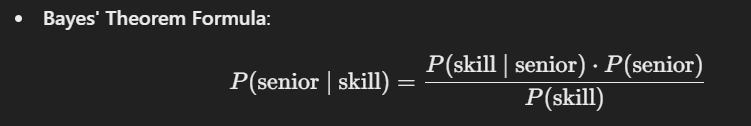

So, I'll be calculating for
- P(senior): Ratio of senior roles to total roles.
- P(skill): Ratio of jobs mentioning each database skill to total jobs.
- P(skill | senior): Ratio of senior jobs mentioning each database skill to total senior jobs.

In [36]:
# P(senior)
P_senior = len(senior_roles) / len(data)

# Calculate P(skill) and P(skill | senior)
P_skill = {}
P_skill_given_senior = {}

for db in databases:
    # P(skill): All jobs mentioning the skill
    P_skill[db] = data['job_description'].apply(lambda s: db in s).sum() / len(data)
    
    # P(skill | senior): Senior jobs mentioning the skill
    P_skill_given_senior[db] = senior_roles['job_description'].apply(lambda s: db in s).sum() / len(senior_roles)

print("P(senior):", P_senior)
print("P(skill):", P_skill)
print("P(skill | senior):", P_skill_given_senior)


P(senior): 0.2075793338578547
P(skill): {'mysql': 0.08785733018620509, 'postgresql': 0.03448728035667453, 'mssql': 0.014424337791765015, 'oracle': 0.18345135064253867, 'sqlite': 0.0036716496197220037, 'mongodb': 0.03920797272488854, 'cassandra': 0.01888276947285602, 'redis': 0.014030946761080514, 'dynamodb': 0.011670600576973512, 'firebase': 0.0013113034356150013, 'neo4j': 0.0036716496197220037, 'cloudsql': 0.00026226068712300026, 'aws': 0.13335955940204564, 'azure': 0.07802255441909257, 'bigquery': 0.0005245213742460005}
P(skill | senior): {'mysql': 0.07770056854074542, 'postgresql': 0.028427037271004423, 'mssql': 0.007580543272267846, 'oracle': 0.1945672773215414, 'sqlite': 0.006317119393556538, 'mongodb': 0.04611497157296273, 'cassandra': 0.02021478205938092, 'redis': 0.02147820593809223, 'dynamodb': 0.013265950726468731, 'firebase': 0.0012634238787113076, 'neo4j': 0.005685407454200884, 'cloudsql': 0.0, 'aws': 0.20025268477574226, 'azure': 0.09665192672141504, 'bigquery': 0.0}


Next we calculate for P(senior | skill) with Bayes' theorem

In [37]:
P_senior_given_skill = {}

for db in databases:
    if P_skill[db] > 0:  # Avoid division by zero
        P_senior_given_skill[db] = (P_skill_given_senior[db] * P_senior) / P_skill[db]
    else:
        P_senior_given_skill[db] = 0

# Display results
sorted_probs = sorted(P_senior_given_skill.items(), key=lambda x: x[1], reverse=True)
print("P(senior | skill) Ranking:")
for db, prob in sorted_probs:
    print(f" - {db}: {prob:.4f}")


P(senior | skill) Ranking:
 - sqlite: 0.3571
 - neo4j: 0.3214
 - redis: 0.3178
 - aws: 0.3117
 - azure: 0.2571
 - mongodb: 0.2441
 - dynamodb: 0.2360
 - cassandra: 0.2222
 - oracle: 0.2202
 - firebase: 0.2000
 - mysql: 0.1836
 - postgresql: 0.1711
 - mssql: 0.1091
 - cloudsql: 0.0000
 - bigquery: 0.0000


Then, we are going to use Monte Carlo Simulation, which uses binomial distribution to model randomness and verify the robustness.

In [38]:
iterations = 10000
monte_carlo_results = {db: [] for db in databases}

# Run Monte Carlo simulations
for db in databases:
    for _ in range(iterations):
        # Randomly determine if the skill occurs (binomially) based on P(skill)
        skill_occurrence = np.random.binomial(1, P_skill[db])
        
        # Randomly determine if the role is senior (binomially) based on P(senior)
        senior_occurrence = np.random.binomial(1, P_senior)
        
        if skill_occurrence and senior_occurrence:
            # Apply Bayes' Theorem directly to calculate P(senior | skill)
            # P(senior | skill) = P(skill | senior) * P(senior) / P(skill)
            P_senior_given_skill = (P_skill_given_senior[db] * P_senior) / P_skill[db]
            monte_carlo_results[db].append(P_senior_given_skill)

# Average results from Monte Carlo simulations
average_results = {db: np.mean(monte_carlo_results[db]) for db in databases}

# Display Monte Carlo results
sorted_monte_carlo = sorted(average_results.items(), key=lambda x: x[1], reverse=True)
print("Monte Carlo Simulation Rankings:")
for db, prob in sorted_monte_carlo:
    print(f" - {db}: {prob:.4f}")
    
top_sim = sorted_monte_carlo[0]

Monte Carlo Simulation Rankings:
 - sqlite: 0.3571
 - neo4j: 0.3214
 - redis: 0.3178
 - cloudsql: nan
 - aws: 0.3117
 - azure: 0.2571
 - mongodb: 0.2441
 - dynamodb: 0.2360
 - cassandra: 0.2222
 - oracle: 0.2202
 - firebase: 0.2000
 - mysql: 0.1836
 - postgresql: 0.1711
 - mssql: 0.1091
 - bigquery: 0.0000


c:\Users\Admin\anaconda3\envs\SE-IR\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Admin\anaconda3\envs\SE-IR\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


`Answer Q3 right below here`

In [43]:
print(f"So the output shows that, {top_sim[0]}({top_sim[1]}), which is top ranking from simulation has the highest posterior probability, \nmeans it's the most strongly associated skill for senior software developers.")

So the output shows that, sqlite(0.35714285714285715), which is top ranking from simulation has the highest posterior probability, 
means it's the most strongly associated skill for senior software developers.
